# Comparing LZ compression algorithms

## Introduction

In this notebook, we"ll compare different versions of the LZ compression algorithm—specifically, LZW, LZMA, LZ77, and LZ78—on a set of sample files.

## Prerequisites

The following libraries are used:

- `lzma` (built-in module)
- `zlib` (built-in module)
- `pandas`
- `matplotlib`
- `seaborn`

In [7]:
import os
from pathlib import Path
import time
import lzma
import zlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lz78

sns.set_theme(style="whitegrid")

In [8]:
sample_dir = Path("samples")
files = [f for f in sample_dir.iterdir() if f.is_file()]

def read_file_content(file_path: Path) -> bytes:
    return file_path.read_bytes()

In [9]:
# LZMA compression

def compress_lzma(data: bytes) -> bytes:
    return lzma.compress(data)

def decompress_lzma(data: bytes) -> bytes:
    return lzma.decompress(data)

In [10]:
# LZ77 compression

def compress_lz77(data: bytes) -> bytes:
    return zlib.compress(data)

def decompress_lz77(data: bytes) -> bytes:
    return zlib.decompress(data)

In [11]:
# LZ78 compression (self-implemented)

def compress_lz78(data: bytes) -> bytes:
    return lz78.compress(data)

def decompress_lz78(data: bytes) -> bytes:
    return lz78.decompress(data)

In [ ]:
results = []

for file_path in files:
    data = read_file_content(file_path)
    original_size = len(data)
    file_name = file_path.name

    algorithms = [
        ("LZMA", compress_lzma, decompress_lzma),
        ("LZ77", compress_lz77, decompress_lz77),
        ("LZ78", compress_lz78, decompress_lz78),
    ]

    for algorithm_name, compress_func, decompress_func in algorithms:
        start_time = time.perf_counter()
        compressed_data = compress_func(data)
        compression_time = time.perf_counter() - start_time

        compressed_size = len(compressed_data)
        compression_ratio = original_size / compressed_size

        start_time = time.perf_counter()
        decompressed_data = decompress_func(compressed_data)
        decompression_time = time.perf_counter() - start_time

        results.append({
            "file": file_name,
            "algorithm": algorithm_name,
            "original size (bytes)": original_size,
            "compressed size (bytes)": compressed_size,
            "compression ratio": compression_ratio,
            "compression time (seconds)": compression_time,
            "decompression time (seconds)": decompression_time,
        })

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
df = pd.DataFrame(results)
df

file algorithm  original size (bytes)  compressed size (bytes)  \
0     random.txt      LZMA                 100000                    76252   
1     random.txt      LZ77                 100000                    75185   
2     random.txt      LZ78                 100000                   170245   
3   alphabet.txt      LZMA                 100000                      176   
4   alphabet.txt      LZ77                 100000                      290   
5   alphabet.txt      LZ78                 100000                    11340   
6        aaa.txt      LZMA                 100000                      148   
7        aaa.txt      LZ77                 100000                      121   
8        aaa.txt      LZ78                 100000                     2235   
9   mobydick.txt      LZMA                 630827                   220016   
10  mobydick.txt      LZ77                 630827                   260312   
11  mobydick.txt      LZ78                 630827                   558260   
12         a.txt      LZMA                      1                       60   
13         a.txt      LZ77                      1                        9   
14         a.txt      LZ78                      1                        5   

    compression ratio  compression time (seconds)  
0            0.762520                    0.024527  
1            0.751850                    0.003359  
2            1.702450                    0.091100  
3            0.001760                    0.004156  
4            0.002900                    0.000317  
5            0.113400                    0.018624  
6            0.001480                    0.001845  
7            0.001210                    0.000362  
8            0.022350                    0.020531  
9            0.348774                    0.203050  
10           0.412652                    0.035244  
11           0.884965                    0.931527  
12          60.000000                    0.001155  
13           9.000000                    0.000013  
14           5.000000                    0.000012

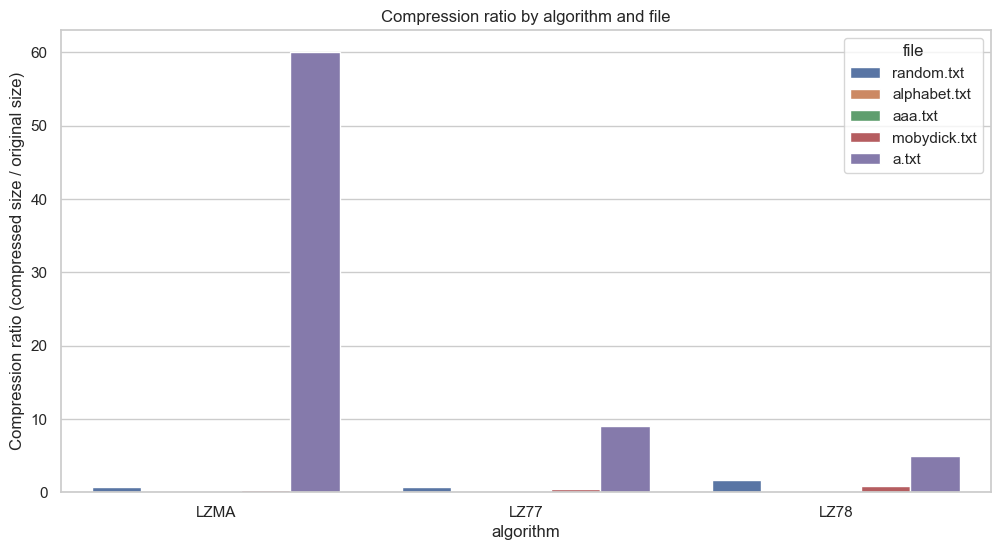

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression ratio", hue="file")
plt.title("Compression ratio by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Compression ratio (original size / compressed size)")
plt.show()

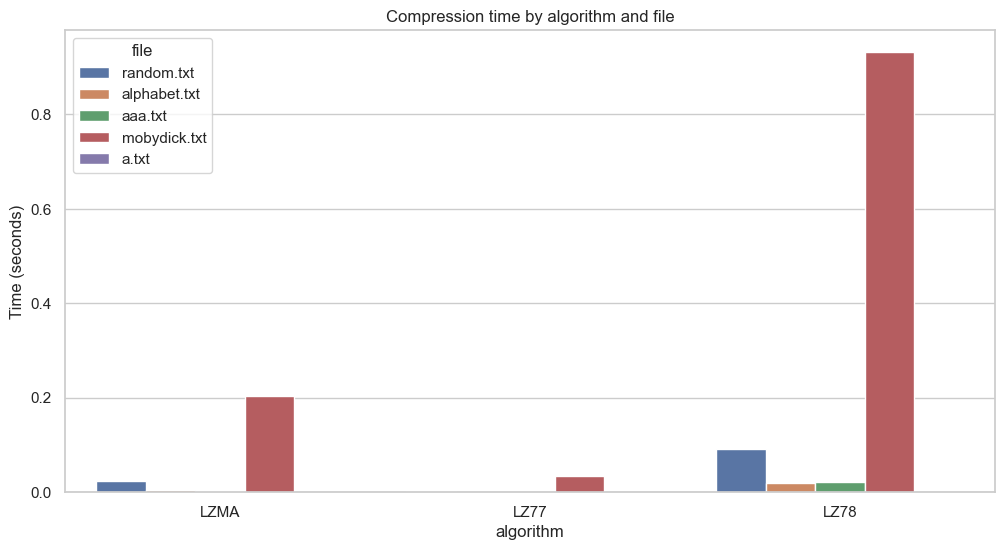

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression time (seconds)", hue="file")
plt.title("Compression time by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)")
plt.show()

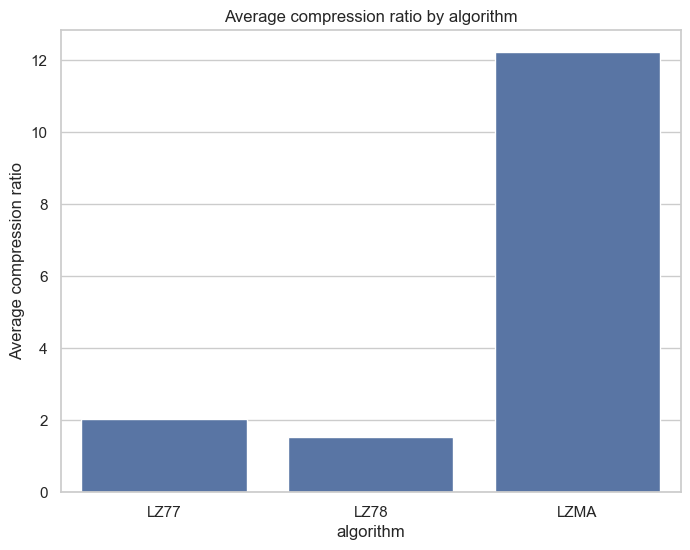

In [ ]:
avg_ratio = df.groupby("algorithm")["compression ratio"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_ratio, x="algorithm", y="compression ratio")
plt.title("Average compression ratio by algorithm" , fontsize=16, weight="bold")
plt.ylabel("Average compression ratio")
plt.show()

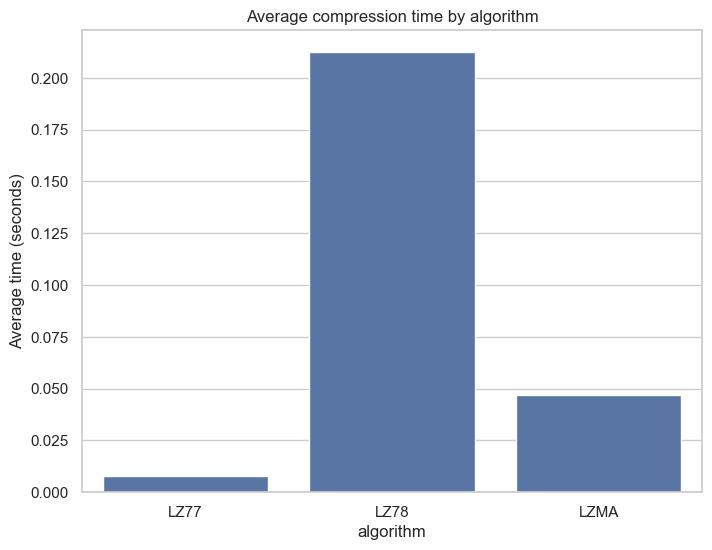

In [ ]:
avg_time = df.groupby("algorithm")["compression time (seconds)"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_time, x="algorithm", y="compression time (seconds)")
plt.title("Average compression time by algorithm", fontsize=16, weight="bold")
plt.ylabel("Average time (seconds)")
plt.show()

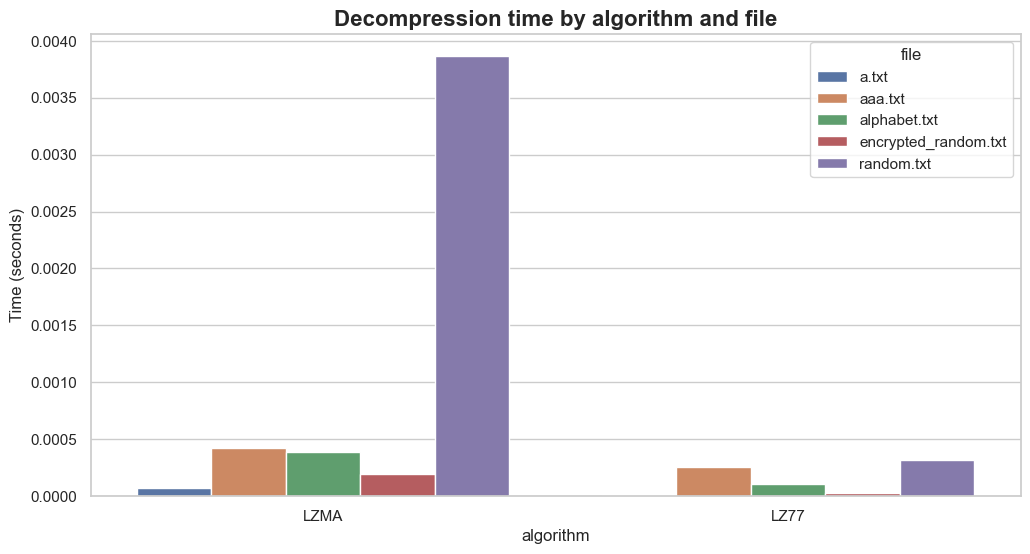

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="decompression time (seconds)", hue="file")
plt.title("Decompression time by algorithm and file", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)")
plt.show()

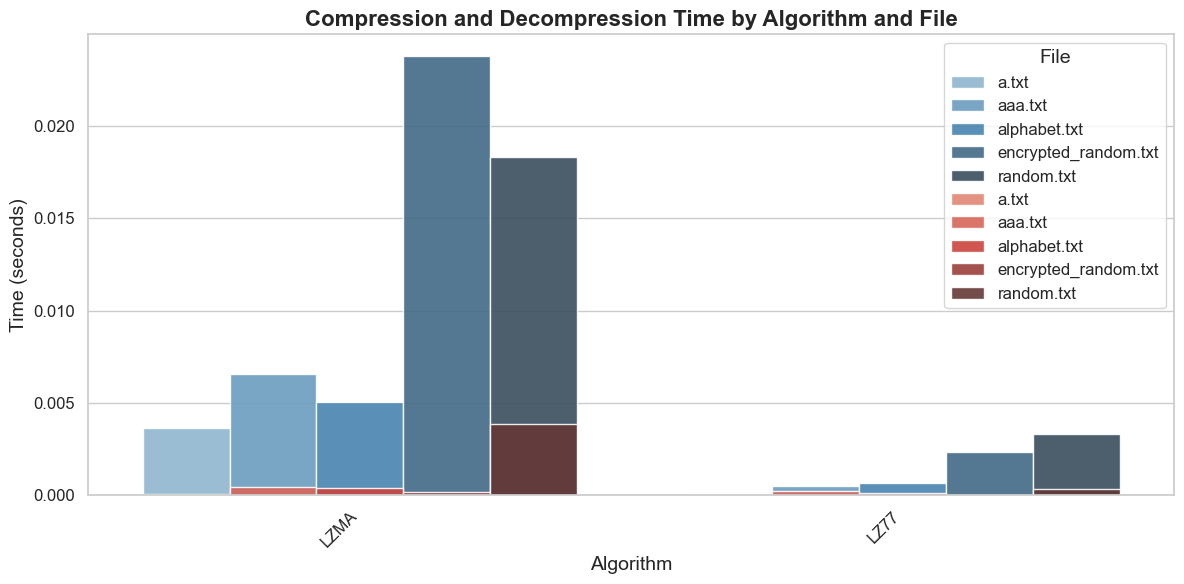

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="algorithm", y="compression time (seconds)", hue="file", palette="Blues_d", alpha=0.9)
sns.barplot(data=df, x="algorithm", y="decompression time (seconds)", hue="file", palette="Reds_d", alpha=0.9)
plt.title("Compression and Decompression Time by Algorithm and File", fontsize=16, weight="bold")
plt.ylabel("Time (seconds)", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.legend(title="File", fontsize=12, title_fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()